In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pdb
import surprise
from surprise import accuracy
from surprise import Reader, Dataset
from surprise.model_selection import KFold
from surprise import model_selection
from surprise import prediction_algorithms

In [2]:
#Question 1
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
print("Shape of movies dataframe " + str(movies_df.shape))
print("Shape of ratings dataframe " + str(ratings_df.shape))
movies_count = movies_df.shape[0]
users_count = ratings_df['userId'].value_counts().size
available_ratings_count = ratings_df.groupby(['userId', 'movieId']).ngroups
possible_ratings = movies_count * users_count
sparsity = available_ratings_count/possible_ratings
print("Number of movies " + str(movies_count))
print("Number of users " + str(users_count))
print("Number of available ratings " + str(available_ratings_count))
print("Number of possible ratings " + str(possible_ratings))
print("Sparsity of the ratings matrix is " + str(sparsity))

Shape of movies dataframe (9742, 3)
Shape of ratings dataframe (100836, 4)
Number of movies 9742
Number of users 610
Number of available ratings 100836
Number of possible ratings 5942620
Sparsity of the ratings matrix is 0.016968273253211548


Text(0, 0.5, 'Count')

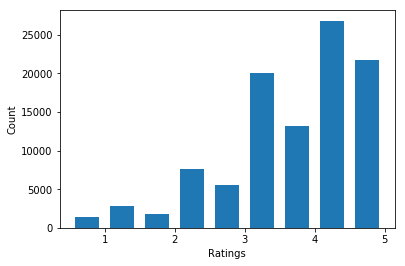

In [30]:
#Question 2
ratings_histogram = plt.hist(ratings_df['rating'], bins=np.linspace(0.5,5,10),rwidth = 0.7)
plt.xlabel('Ratings')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

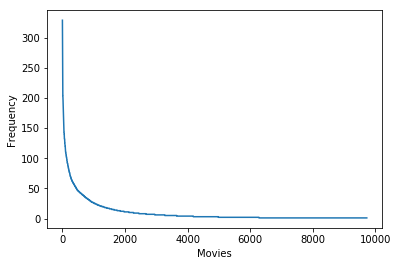

In [4]:
#Question 3
ratings_frequency = -np.sort(-ratings_df.groupby(['movieId']).size())[::1]
plt.plot(ratings_frequency)
plt.xlabel('Movies')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

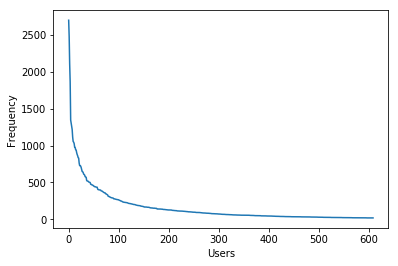

In [5]:
#Question 4
ratings_frequency = -np.sort(-ratings_df.groupby(['userId']).size())[::1]
plt.plot(ratings_frequency)
plt.xlabel('Users')
plt.ylabel('Frequency')

In [6]:
#Question 5


Text(0, 0.5, 'Count')

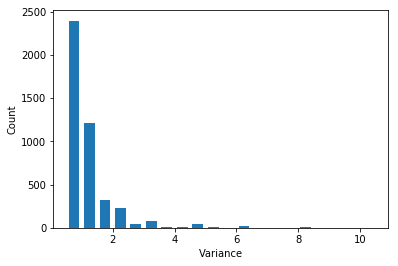

In [31]:
#Question 6 ----- check
ratings_frequency = ratings_df.groupby(['movieId'])
ratings_variance = ratings_frequency['rating'].agg(np.nanvar)
variance_histogram = plt.hist(ratings_variance,bins=np.arange(0.5,max(ratings_variance)+0.5,0.5).tolist(),rwidth = 0.7)
plt.xlabel('Variance')
plt.ylabel('Count')

In [8]:
#Question 7
#Question 8
#Question 9

In [9]:
#Question 10  ----check mink or maxk
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)
data = Dataset.load_from_file('ratings.csv', reader=reader)
sim_options = {'name': 'pearson',
               'user_based': True  #User-based
               }

In [10]:
rmse_values = []
mae_values = []
k_values = np.arange(2,101,2)
for k_temp in k_values:
    print("Model with k equal to " + str(k_temp))
    q10_algo = prediction_algorithms.knns.KNNWithMeans(k=k_temp, sim_options=sim_options)
    q10_model = model_selection.validation.cross_validate(q10_algo, data, cv=10, return_train_measures=True, n_jobs=-1)
    rmse_values.append(np.average(q10_model['test_rmse']))
    mae_values.append(np.average(q10_model['test_mae']))
    
    
    

Model with k equal to 2
Model with k equal to 4
Model with k equal to 6
Model with k equal to 8
Model with k equal to 10
Model with k equal to 12
Model with k equal to 14
Model with k equal to 16
Model with k equal to 18
Model with k equal to 20
Model with k equal to 22
Model with k equal to 24
Model with k equal to 26
Model with k equal to 28
Model with k equal to 30
Model with k equal to 32
Model with k equal to 34
Model with k equal to 36
Model with k equal to 38
Model with k equal to 40
Model with k equal to 42
Model with k equal to 44
Model with k equal to 46
Model with k equal to 48
Model with k equal to 50
Model with k equal to 52
Model with k equal to 54
Model with k equal to 56
Model with k equal to 58
Model with k equal to 60
Model with k equal to 62
Model with k equal to 64
Model with k equal to 66
Model with k equal to 68
Model with k equal to 70
Model with k equal to 72
Model with k equal to 74
Model with k equal to 76
Model with k equal to 78
Model with k equal to 80
Mode

In [182]:
A = np.sort(rmse_values)
idx = np.argsort(rmse_values)
print("k", '\t', "avg. rmse")     #table column headings
print("---", '\t', "-----")
k_values = np.arange(2,101,2)

for i in range(0,len(rmse_values)):
    print(k_values[idx[i]], '\t', A[i])

A = np.sort(mae_values)
idx = np.argsort(mae_values)

print("k", '\t', "avg. mae")     #table column headings
print("---", '\t', "-----")

for i in range(0,len(mae_values)):
    print(k_values[idx[i]], '\t', A[i])

k 	 avg. rmse
--- 	 -----
58 	 0.8882001018383286
30 	 0.8883339045991552
54 	 0.888405939649133
86 	 0.8887273502074216
56 	 0.888765663541338
50 	 0.888782858167892
80 	 0.8888152005522599
36 	 0.8889338156464366
38 	 0.8889434238391137
46 	 0.8890125310734567
42 	 0.8890288423096697
40 	 0.8891550701592218
70 	 0.8892748452788268
84 	 0.8893789032508271
62 	 0.8894259444197866
60 	 0.8894696800139889
76 	 0.8894940278066651
34 	 0.8895417784926091
68 	 0.8895869463423198
64 	 0.889599977042268
32 	 0.8896215922240067
98 	 0.88967610265898
94 	 0.8897083841002587
88 	 0.8897193769267501
82 	 0.8897293366977534
44 	 0.8897752667757881
100 	 0.8897960513743343
92 	 0.8898153490498555
96 	 0.8898556741934476
52 	 0.8899250739739175
72 	 0.8899607799691704
74 	 0.8899959983123754
20 	 0.8899985448947121
24 	 0.8900272111324247
66 	 0.8900366362212756
90 	 0.8900615945396639
48 	 0.890099442564442
78 	 0.8902352175404327
28 	 0.8904708606477119
22 	 0.8910254387617469
26 	 0.8911817750107

In [45]:
A = np.sort(rmse_values)
idx = np.argsort(rmse_values)
print('\n')
print(np.sort(rmse_values))

for i in range(0,len(rmse_values)):
    print('rmse is', A[i])
    print('idx is', idx[i])
    print('k is',k_values[idx[i]])



[0.8882001  0.8883339  0.88840594 0.88872735 0.88876566 0.88878286
 0.8888152  0.88893382 0.88894342 0.88901253 0.88902884 0.88915507
 0.88927485 0.8893789  0.88942594 0.88946968 0.88949403 0.88954178
 0.88958695 0.88959998 0.88962159 0.8896761  0.88970838 0.88971938
 0.88972934 0.88977527 0.88979605 0.88981535 0.88985567 0.88992507
 0.88996078 0.889996   0.88999854 0.89002721 0.89003664 0.89006159
 0.89009944 0.89023522 0.89047086 0.89102544 0.89118178 0.89162287
 0.89335599 0.89432523 0.89878033 0.90153963 0.90638884 0.9194834
 0.94366857 1.01450373]
rmse is 0.8882001018383286
idx is 28
k is 58
rmse is 0.8883339045991552
idx is 14
k is 30
rmse is 0.888405939649133
idx is 26
k is 54
rmse is 0.8887273502074216
idx is 42
k is 86
rmse is 0.888765663541338
idx is 27
k is 56
rmse is 0.888782858167892
idx is 24
k is 50
rmse is 0.8888152005522599
idx is 39
k is 80
rmse is 0.8889338156464366
idx is 17
k is 36
rmse is 0.8889434238391137
idx is 18
k is 38
rmse is 0.8890125310734567
idx is 22


In [ ]:
A = np.sort(mae_values)
idx = np.argsort(mae_values)
print('\n')
print(np.sort(mae_values))

for i in range(0,len(rmse_values)):
    print('rmse is', A[i])
    print('idx is', idx[i])
    print('k is',k_values[idx[i]])

In [20]:
i = 0
for k_temp in k_values:
    print("Model with k equal to " + str(k_temp))
    print("its rmse=",rmse_values[i])
    print("its mae=",mae_values[i])
    i +=1

k1 = np.argsort(np.array(rmse_values))
k2 = np.argsort(np.array(mae_values))
print("Increasing K with respect to rmse is")
print(k_values[k1])
print("Increasing K with respect to mae is")
print(k_values[k2])

print("minimum average RMSE",np.min(rmse_values))
print("minimum average MAE",np.min(mae_values))

print("k of minimum average RMSE",rmse_values.index(np.min(rmse_values)))
print("k of minimum average MAE",mae_values.index(np.min(mae_values)))

print(np.argsort(mae_values))
print(k_values[28])

Model with k equal to 2
its rmse= 1.0145037277108084
its mae= 0.7830809093947596
Model with k equal to 4
its rmse= 0.9436685748280162
its mae= 0.7242800010026688
Model with k equal to 6
its rmse= 0.9194833958635231
its mae= 0.7053351573107645
Model with k equal to 8
its rmse= 0.906388835744836
its mae= 0.6937133069067574
Model with k equal to 10
its rmse= 0.9015396320572806
its mae= 0.6889526916735058
Model with k equal to 12
its rmse= 0.898780325827351
its mae= 0.6861314844935569
Model with k equal to 14
its rmse= 0.8943252343980381
its mae= 0.6819402578435931
Model with k equal to 16
its rmse= 0.8933559909451129
its mae= 0.6813579041016021
Model with k equal to 18
its rmse= 0.8916228693711579
its mae= 0.679551657596976
Model with k equal to 20
its rmse= 0.8899985448947121
its mae= 0.6787253423631724
Model with k equal to 22
its rmse= 0.8910254387617469
its mae= 0.6791375672791954
Model with k equal to 24
its rmse= 0.8900272111324247
its mae= 0.6779592734157527
Model with k equal to 2

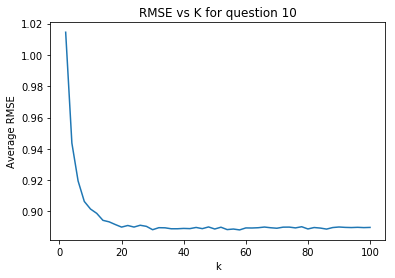

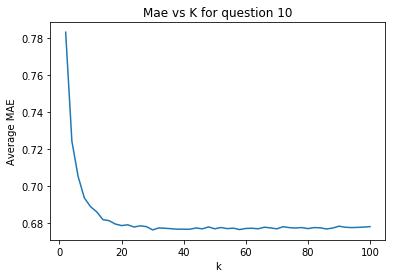

In [21]:
plt.plot(k_values,rmse_values)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('RMSE vs K for question 10')
plt.show()
plt.plot(k_values,mae_values)
plt.xlabel('k')
plt.ylabel('Average MAE')
plt.title('Mae vs K for question 10')
plt.show()

In [32]:
#Question 11
minimum_k = 24
#index=28
#print("steady state value of average RMSE",np.min(rmse_values[index]))
#print("steady state value of average MAE",np.min(mae_values[index]))

In [140]:
'''
def getPopular(testset,n):
    movie,freq=np.unique(np.array(testset)[:,1],return_counts=True)
    print(movie)
    print(freq)
    new_test = []
    a=zip(movie,freq)
    pop=map(lambda y:y[0],filter(lambda x:x[1]>n,a))
    t=filter(lambda x:x[1] in pop,testset)
    return t

def getUnpopular(testset,n):
    movie,freq=np.unique(np.array(testset)[:,1],return_counts=True)
    a=zip(movie,freq)
    pop=map(lambda y:y[0],filter(lambda x:x[1]<=n,a))
    t=filter(lambda x:x[1] in pop,testset)

    return t


def getHighVariance(testset):
    testset=getPopular(testset,4)
    ans=(pd.DataFrame.from_records(testset).groupby(1)[2].var(ddof=False))
    af=pd.DataFrame.from_records(np.transpose([ans.index,ans.values]))
    high_var=af[af[1]>2]
    high_var=high_var[0]
    high_var=list(high_var)
    t=filter(lambda x:x[1] in high_var,testset)
    return t
'''
#Question 12

def getPopular(testset,k=2):
    movie_dict={}
    movie_list=[]
    for test_data in testset:
        if test_data[1] not in movie_dict:
            movie_dict.setdefault(test_data[1],1)
        else:
            movie_dict[test_data[1]]+=1
    for key,value in movie_dict.items():
        if value>k:
            movie_list.append(key)


    testset2 = []
    for test_data in testset:
        if test_data[1] in movie_list:
            testset2.append(test_data)             
    return testset2


def getUnpopular(testset):
    movie_dict={}
    movie_list=[]
    for test_data in testset:
        if test_data[1] not in movie_dict:
            movie_dict.setdefault(test_data[1],1)
        else:
            movie_dict[test_data[1]]+=1
    for key,value in movie_dict.items():
        if value<=2:
            movie_list.append(key)
    testset2=[]
    for test_data in testset:
        if test_data[1] in movie_list:
            testset2.append(test_data)
    return testset2

def getHighVariance(testset):
    testset=getPopular(testset,5)
    movie_dict = {}
    movie_list = []
    for test_data in testset:
        if test_data[1] not in movie_dict:

            movie_dict.setdefault(test_data[1],[test_data[2]])
        else:
            movie_dict[test_data[1]].append(test_data[2])
    for key, value in movie_dict.items():
        var=np.var(value)
        if var>2:
            movie_list.append(key)
    testset2 = []
    for test_data in testset:
        if test_data[1] in movie_list:
            testset2.append(test_data)
    return testset2

In [134]:
'''
def popular_movie_trimmer(testdata):
    print(type(testdata))
    new_testdata = []
    for index in range(len(testdata)):
        if(testdata[index][2]>2):
            new_testdata.append(testdata[index])
    return new_testdata

def unpopular_movie_trimmer(testdata):
    new_testdata = []
    for index in range(len(testdata)):
        if(testdata[index][2]<=2):
            new_testdata.append(testdata[index])
    return new_testdata


def high_variance_movie_trimmer(testdata):
    testdata_df = pd.DataFrame(testdata)
    testdata_df_group = testdata_df.groupby([1]).filter(lambda x: len(x) >= 5 and  np.nanvar(x[2])>=2)
    new_testdata = [tuple(x) for x in testdata_df_group.values]
    return new_testdata
'''

'\ndef popular_movie_trimmer(testdata):\n    print(type(testdata))\n    new_testdata = []\n    for index in range(len(testdata)):\n        if(testdata[index][2]>2):\n            new_testdata.append(testdata[index])\n    return new_testdata\n\ndef unpopular_movie_trimmer(testdata):\n    new_testdata = []\n    for index in range(len(testdata)):\n        if(testdata[index][2]<=2):\n            new_testdata.append(testdata[index])\n    return new_testdata\n\n\ndef high_variance_movie_trimmer(testdata):\n    testdata_df = pd.DataFrame(testdata)\n    testdata_df_group = testdata_df.groupby([1]).filter(lambda x: len(x) >= 5 and  np.nanvar(x[2])>=2)\n    new_testdata = [tuple(x) for x in testdata_df_group.values]\n    return new_testdata\n'

In [173]:
def knn_train(trimmer):
    q12_rmse_values = []
    q12_mae_values = []
    k_values = np.arange(2,101,2)
    for k_temp in k_values:
        print("Model with k equal to " + str(k_temp))
        kf = KFold(n_splits=10)
        q12_algo = prediction_algorithms.knns.KNNWithMeans(k=k_temp, sim_options=sim_options)
        rmse_values_temp = []
        mae_values_temp = []
        pair_no = 1
        for trainset, testset in kf.split(data):
            print("----Pair " + str(pair_no))
            pair_no = pair_no + 1
            q12_algo.fit(trainset)
            trimmed_testset = trimmer(testset)
            print("Size of orginal testset " + str(len(testset)))
            print("Size of trimmed testset " + str(len(trimmed_testset)))  
            predictions = q12_algo.test(trimmed_testset)
            rmse_values_temp.append(accuracy.rmse(predictions))
            mae_values_temp.append(accuracy.mae(predictions))
        q12_rmse_values.append(np.average(rmse_values_temp))
        q12_mae_values.append(np.average(mae_values_temp))
    print("minimum average RMSE is ",np.min(q12_rmse_values))
    plt.plot(k_values,q12_rmse_values)
    plt.xlabel('k')
    plt.ylabel('Average RMSE')
    plt.show()
    plt.plot(k_values,q12_mae_values)
    plt.xlabel('k')
    plt.ylabel('Average MAE')
    plt.show()
    
    print("min avg mae is",np.min(q12_mae_values))
    print("min avg rmse is",np.min(q12_rmse_values))
    
    A = np.sort(q12_rmse_values)
    idx = np.argsort(q12_rmse_values)
    print("k", '\t', "avg. rmse")     #table column headings
    print("---", '\t', "-----")

    for i in range(0,len(q12_rmse_values)):
        #print('mae is', A[i])
        #print('idx is', idx[i])
        #print('k is',factor_values[idx[i]])
        print(k_values[idx[i]], '\t', A[i])

    A = np.sort(q12_mae_values)
    idx = np.argsort(q12_mae_values)

    print("k", '\t', "avg. mae")     #table column headings
    print("---", '\t', "-----")

    for i in range(0,len(q12_mae_values)):
        #print('mae is', A[i])
        #print('idx is', idx[i])
        #print('k is',factor_values[idx[i]])
        print(k_values[idx[i]], '\t', A[i])
    

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6831
RMSE: 1.0245
MAE:  0.7942
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6956
RMSE: 1.0313
MAE:  0.7967
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6855
RMSE: 1.0074
MAE:  0.7778
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6935
RMSE: 1.0143
MAE:  0.7869
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6908
RMSE: 1.0317
MAE:  0.7968
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset

RMSE: 0.8909
MAE:  0.6813
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6923
RMSE: 0.8844
MAE:  0.6751
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6922
RMSE: 0.8736
MAE:  0.6686
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6807
RMSE: 0.8704
MAE:  0.6634
Model with k equal to 12
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6870
RMSE: 0.8800
MAE:  0.6679
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6803
RMSE: 0.8612
MAE:  0.6617
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.8717
MAE:  0.6635
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6951
RMSE: 0.8644
MAE:  0.6596
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6940
RMSE: 0.8500
MAE:  0.6470
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6860
RMSE: 0.8649
MAE:  0.6541
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6897
RMSE: 0.8569
MAE:  0.6533
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6942
RMSE: 0.8592
MAE:  0.6557
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal test

RMSE: 0.8438
MAE:  0.6464
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6865
RMSE: 0.8520
MAE:  0.6520
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6863
RMSE: 0.8684
MAE:  0.6593
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6842
RMSE: 0.8478
MAE:  0.6488
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6857
RMSE: 0.8675
MAE:  0.6580
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6929
RMSE: 0.8560
MAE:  0.6535
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

RMSE: 0.8582
MAE:  0.6489
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6842
RMSE: 0.8440
MAE:  0.6443
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6943
RMSE: 0.8489
MAE:  0.6429
Model with k equal to 40
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6821
RMSE: 0.8731
MAE:  0.6643
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6861
RMSE: 0.8482
MAE:  0.6485
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6865
RMSE: 0.8571
MAE:  0.6491
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.8578
MAE:  0.6535
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6964
RMSE: 0.8666
MAE:  0.6602
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6878
RMSE: 0.8528
MAE:  0.6500
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6931
RMSE: 0.8568
MAE:  0.6513
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6941
RMSE: 0.8443
MAE:  0.6483
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6858
RMSE: 0.8586
MAE:  0.6512
Model with k equal to 50
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.8609
MAE:  0.6550
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6844
RMSE: 0.8657
MAE:  0.6566
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6864
RMSE: 0.8413
MAE:  0.6401
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6873
RMSE: 0.8537
MAE:  0.6504
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6953
RMSE: 0.8511
MAE:  0.6549
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6912
RMSE: 0.8550
MAE:  0.6494
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

RMSE: 0.8530
MAE:  0.6478
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6938
RMSE: 0.8647
MAE:  0.6544
Model with k equal to 68
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6853
RMSE: 0.8632
MAE:  0.6594
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6896
RMSE: 0.8603
MAE:  0.6536
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6882
RMSE: 0.8631
MAE:  0.6516
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6922
RMSE: 0.8575
MAE:  0.6538
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.8542
MAE:  0.6529
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6867
RMSE: 0.8619
MAE:  0.6553
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6865
RMSE: 0.8453
MAE:  0.6472
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6901
RMSE: 0.8619
MAE:  0.6542
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6911
RMSE: 0.8550
MAE:  0.6522
Model with k equal to 78
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6976
RMSE: 0.8728
MAE:  0.6632
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.8532
MAE:  0.6454
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6890
RMSE: 0.8443
MAE:  0.6451
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6905
RMSE: 0.8695
MAE:  0.6649
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6858
RMSE: 0.8577
MAE:  0.6502
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6900
RMSE: 0.8480
MAE:  0.6514
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6799
RMSE: 0.8478
MAE:  0.6473
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

RMSE: 0.8623
MAE:  0.6597
Model with k equal to 96
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6829
RMSE: 0.8464
MAE:  0.6464
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6890
RMSE: 0.8648
MAE:  0.6591
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6821
RMSE: 0.8511
MAE:  0.6517
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6839
RMSE: 0.8583
MAE:  0.6557
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6906
RMSE: 0.8530
MAE:  0.6503
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matr

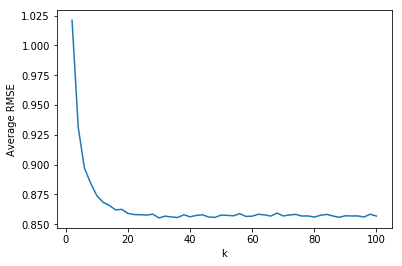

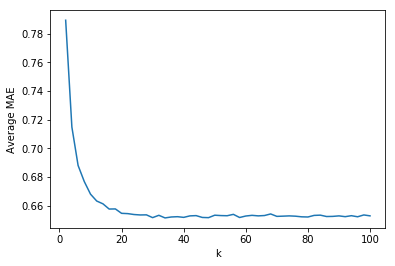

min avg mae is 0.6513446141002656
min avg rmse is 0.8552870263226039
k 	 avg. rmse
--- 	 -----
30 	 0.8552870263226039
36 	 0.8556272261729578
48 	 0.8557591420755436
88 	 0.8557886268713016
80 	 0.8560091803297449
46 	 0.8560122890782017
96 	 0.8560662664601606
34 	 0.8561011798669377
40 	 0.8562091972403246
58 	 0.8565426130087876
32 	 0.856761664726007
60 	 0.8567680333367053
66 	 0.8568342868110186
100 	 0.8568410149100147
76 	 0.8568690354060438
86 	 0.8569037609319559
92 	 0.8569071698302546
70 	 0.8569323048476509
78 	 0.8569372194584923
94 	 0.8569633783522891
54 	 0.8570630905766532
90 	 0.8570874603605396
52 	 0.8574070035270847
42 	 0.8574168683865441
82 	 0.8575154211519187
50 	 0.8576637607892905
26 	 0.8576855886335842
72 	 0.8577327489447942
64 	 0.8578064218747512
44 	 0.8578786530163545
38 	 0.8579339218826177
24 	 0.8579649487702155
22 	 0.8581237173042495
84 	 0.8582498837886579
74 	 0.8582669725544649
62 	 0.8583618414610218
98 	 0.8583712155046579
28 	 0.8584165537

In [174]:
#Question 12
knn_train(getPopular)

In [175]:
import os
file_path = os.path.expanduser('ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3190
RMSE: 1.0288
MAE:  0.7942
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3132
RMSE: 1.0039
MAE:  0.7696
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3174
RMSE: 1.0258
MAE:  0.7938
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3168
RMSE: 1.0045
MAE:  0.7793
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3290
RMSE: 1.0113
MAE:  0.7767
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset

----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3168
RMSE: 0.9579
MAE:  0.7259
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3196
RMSE: 0.9611
MAE:  0.7303
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3184
RMSE: 0.9606
MAE:  0.7412
Model with k equal to 12
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3104
RMSE: 0.9503
MAE:  0.7293
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3163
RMSE: 0.9456
MAE:  0.7232
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3264
RMSE: 0.9656
MAE:  0.7393
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3203
RMSE: 0.9398
MAE:  0.7154
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3279
RMSE: 0.9640
MAE:  0.7373
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3189
RMSE: 0.9584
MAE:  0.7268
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3155
RMSE: 0.9568
MAE:  0.7350
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed 

----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3233
RMSE: 0.9451
MAE:  0.7201
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3217
RMSE: 0.9432
MAE:  0.7264
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3212
RMSE: 0.9343
MAE:  0.7174
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3189
RMSE: 0.9632
MAE:  0.7304
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3195
RMSE: 0.9563
MAE:  0.7296
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed t

----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3213
RMSE: 0.9639
MAE:  0.7351
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3248
RMSE: 0.9649
MAE:  0.7400
Model with k equal to 40
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3143
RMSE: 0.9558
MAE:  0.7336
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3192
RMSE: 0.9665
MAE:  0.7376
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3186
RMSE: 0.9587
MAE:  0.7345
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3157
RMSE: 0.9670
MAE:  0.7459
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3155
RMSE: 0.9911
MAE:  0.7505
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3265
RMSE: 0.9666
MAE:  0.7342
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3140
RMSE: 0.9594
MAE:  0.7333
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3218
RMSE: 0.9540
MAE:  0.7324
Model with k equal to 50
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3167
RMSE: 0.9467
MAE:  0.7192
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3175
RMSE: 0.9788
MAE:  0.7459
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3190
RMSE: 0.9264
MAE:  0.7072
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3138
RMSE: 0.9687
MAE:  0.7384
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3180
RMSE: 0.9526
MAE:  0.7249
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed t

----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3130
RMSE: 0.9517
MAE:  0.7338
Model with k equal to 68
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3213
RMSE: 0.9286
MAE:  0.7085
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3078
RMSE: 0.9503
MAE:  0.7223
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3206
RMSE: 0.9656
MAE:  0.7441
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3183
RMSE: 0.9597
MAE:  0.7350
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3163
RMSE: 0.9498
MAE:  0.7211
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3190
RMSE: 0.9579
MAE:  0.7333
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3104
RMSE: 0.9705
MAE:  0.7458
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3180
RMSE: 0.9531
MAE:  0.7269
Model with k equal to 78
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3258
RMSE: 0.9573
MAE:  0.7350
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3219
RMSE: 0.9379
MAE:  0.7130
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3117
RMSE: 0.9754
MAE:  0.7448
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3131
RMSE: 0.9494
MAE:  0.7273
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3199
RMSE: 0.9541
MAE:  0.7273
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3271
RMSE: 0.9494
MAE:  0.7245
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed t

----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3198
RMSE: 0.9385
MAE:  0.7211
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3268
RMSE: 0.9528
MAE:  0.7254
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3203
RMSE: 0.9494
MAE:  0.7269
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3214
RMSE: 0.9538
MAE:  0.7309
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3165
RMSE: 0.9712
MAE:  0.7460
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed t

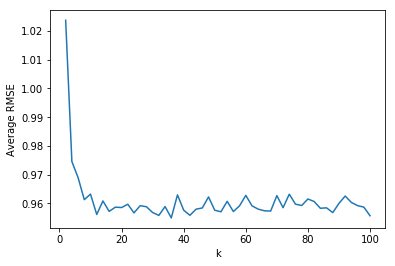

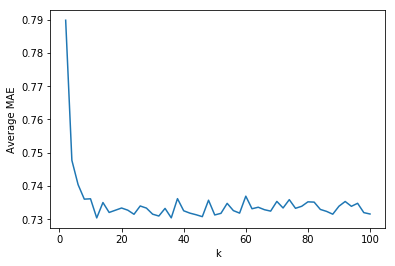

min avg mae is 0.7304257247077597
min avg rmse is 0.954987582469893
k 	 avg. rmse
--- 	 -----
36 	 0.954987582469893
100 	 0.9557400479820138
32 	 0.9558601720629758
42 	 0.9558959297623911
12 	 0.956186154537925
24 	 0.9567440584607025
88 	 0.9568373337140923
30 	 0.956865025611379
52 	 0.9571144574843128
56 	 0.9572079333783489
16 	 0.9572537783489234
68 	 0.9573658685683343
66 	 0.9574635791987252
50 	 0.9576592947216815
40 	 0.9576779175251096
44 	 0.9580278472369121
64 	 0.95803764742749
84 	 0.9583454609051373
46 	 0.9584497731641148
86 	 0.9584886402832072
72 	 0.9585467983387037
20 	 0.9585941950965609
18 	 0.9587274411322605
98 	 0.9587413524878092
28 	 0.9588728165470689
34 	 0.9589382307130746
62 	 0.9591779705888953
58 	 0.9592188333543534
26 	 0.959254106761964
96 	 0.9592548950224875
78 	 0.9593136827773225
22 	 0.959735883188991
76 	 0.9597604218674796
90 	 0.9600491053347516
94 	 0.9603583957102841
82 	 0.9607041921719477
54 	 0.9607558207059788
14 	 0.960881246754076
8

In [176]:
#Question 13
knn_train(getUnpopular)

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 74
RMSE: 1.3510
MAE:  1.0390
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 49
RMSE: 1.3839
MAE:  1.1152
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 42
RMSE: 1.4459
MAE:  1.0701
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 31
RMSE: 1.4533
MAE:  1.1091
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 73
RMSE: 1.4469
MAE:  1.0767
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Siz

Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 34
RMSE: 1.3627
MAE:  1.0207
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 34
RMSE: 1.3591
MAE:  0.9960
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 84
RMSE: 1.3401
MAE:  1.0484
Model with k equal to 12
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 47
RMSE: 1.4413
MAE:  1.1664
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 34
RMSE: 1.3445
MAE:  0.9909
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 34
RMSE: 1.4300
MAE:  1.0334
--

Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 35
RMSE: 1.2718
MAE:  0.9454
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 43
RMSE: 1.5102
MAE:  1.1877
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 46
RMSE: 1.3233
MAE:  1.0439
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 49
RMSE: 1.4721
MAE:  1.1983
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 80
RMSE: 1.4944
MAE:  1.0717
Model with k equal to 22
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trim

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 71
RMSE: 1.3451
MAE:  1.0553
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 19
RMSE: 1.5381
MAE:  1.1538
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 112
RMSE: 1.4087
MAE:  1.1099
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 30
RMSE: 1.4335
MAE:  1.1301
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 26
RMSE: 1.5124
MAE:  1.1687
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 33
RMSE: 1.5742
MAE:  1.2162
----Pair 9
Computing the pe

Size of orginal testset 10084
Size of trimmed testset 33
RMSE: 1.3406
MAE:  1.0248
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 27
RMSE: 1.5691
MAE:  1.2034
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 24
RMSE: 1.5243
MAE:  1.2130
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 34
RMSE: 1.5543
MAE:  1.2068
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 27
RMSE: 1.3616
MAE:  1.0153
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 52
RMSE: 1.5437
MAE:  1.1535
----Pair 7
Computing the pearson similarity matrix...
Done com

Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 20
RMSE: 1.2158
MAE:  0.9690
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 31
RMSE: 1.3860
MAE:  1.1457
Model with k equal to 50
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 75
RMSE: 1.4106
MAE:  1.1217
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 84
RMSE: 1.4560
MAE:  1.1638
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 78
RMSE: 1.4509
MAE:  1.1272
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 33
RMSE: 1.4502
MAE:  1.1326
--

----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 46
RMSE: 1.4182
MAE:  1.0660
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 80
RMSE: 1.3132
MAE:  0.9716
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 69
RMSE: 1.4473
MAE:  1.1272
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 62
RMSE: 1.3470
MAE:  1.0332
Model with k equal to 60
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 73
RMSE: 1.4400
MAE:  1.0554
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
S

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 86
RMSE: 1.3664
MAE:  1.0590
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 50
RMSE: 1.4492
MAE:  1.0894
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 71
RMSE: 1.3781
MAE:  1.0691
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 94
RMSE: 1.4234
MAE:  1.0544
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 51
RMSE: 1.4843
MAE:  1.1065
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 73
RMSE: 1.2789
MAE:  0.9623
----Pair 10
Computing the pe

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 116
RMSE: 1.4694
MAE:  1.0926
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 81
RMSE: 1.3977
MAE:  1.0537
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 94
RMSE: 1.4523
MAE:  1.1251
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 40
RMSE: 1.3449
MAE:  1.0198
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 78
RMSE: 1.4516
MAE:  1.0732
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 42
RMSE: 1.3911
MAE:  1.1379
----Pair 8
Computing the pe

----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 147
RMSE: 1.4077
MAE:  1.0714
Model with k equal to 88
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 71
RMSE: 1.4739
MAE:  1.1512
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 38
RMSE: 1.3043
MAE:  1.0444
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 40
RMSE: 1.4909
MAE:  1.2073
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 76
RMSE: 1.3713
MAE:  1.0139
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084


Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 64
RMSE: 1.4068
MAE:  1.1210
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 52
RMSE: 1.4468
MAE:  1.1555
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 55
RMSE: 1.4152
MAE:  1.0230
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 35
RMSE: 1.4100
MAE:  1.1636
Model with k equal to 98
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 47
RMSE: 1.4022
MAE:  1.1569
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 114
RMSE: 1.4352
MAE:  1.1628
-

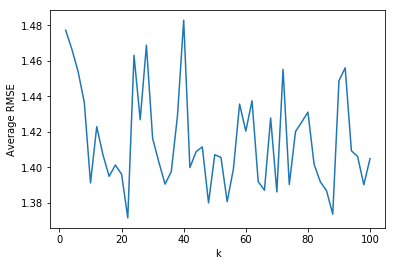

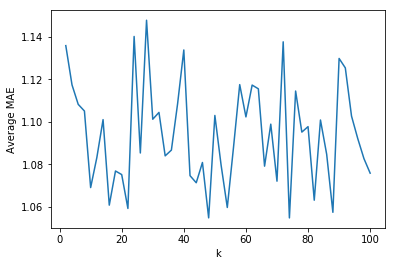

min avg mae is 1.0547141178238275
min avg rmse is 1.3715410363445266
k 	 avg. rmse
--- 	 -----
22 	 1.3715410363445266
88 	 1.373670097400139
48 	 1.3799765054077406
54 	 1.3806719446014701
70 	 1.3861888366103137
86 	 1.3868250531984594
66 	 1.3871326606807934
98 	 1.3902085957256312
74 	 1.3903238133530402
34 	 1.390561404170888
10 	 1.3912219309150196
84 	 1.3918704697142759
64 	 1.3919450229836512
16 	 1.3949413951178464
20 	 1.3961474990840261
36 	 1.3976004105627378
56 	 1.3990155719085537
42 	 1.3998769308293308
18 	 1.4012932908767513
82 	 1.4016556498299289
32 	 1.4029961936820927
100 	 1.404950298056947
52 	 1.4055785427563288
96 	 1.4061129517820325
14 	 1.407082860719156
50 	 1.4071046007414791
44 	 1.4088228311589988
94 	 1.4093260839071682
46 	 1.4115085009416857
30 	 1.4163238272410656
76 	 1.4200847335280735
60 	 1.4203827921434713
12 	 1.4229197056725105
78 	 1.4255106398908184
26 	 1.4268105000847338
68 	 1.427757337625798
38 	 1.4289804716105585
80 	 1.43104846015416

In [177]:
#Question 14

knn_train(getHighVariance)

In [35]:
import random

raw_ratings = data.raw_ratings

# shuffle ratings if you want
random.shuffle(raw_ratings)

# A = 90% of the data, B = 10% of the data
threshold = int(.9 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]
data.raw_ratings = A_raw_ratings
trainset = data.build_full_trainset()
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B

Computing the pearson similarity matrix...
Done computing similarity matrix.
Plotting the ROC curve for threshold2.5
auc is =  0.7844912358504249


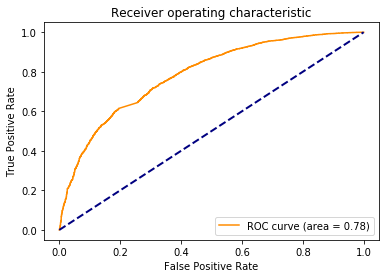

Plotting the ROC curve for threshold3
auc is =  0.7778681849634175


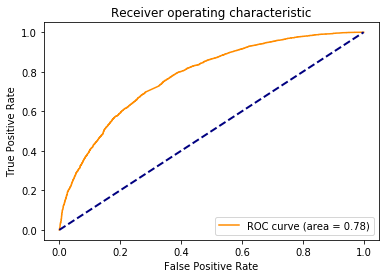

Plotting the ROC curve for threshold3.5
auc is =  0.7730447553934093


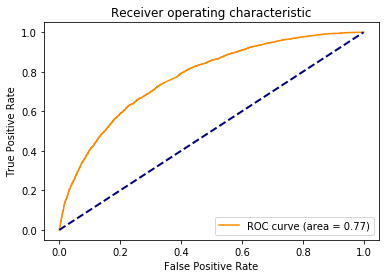

Plotting the ROC curve for threshold4
auc is =  0.7829690010357027


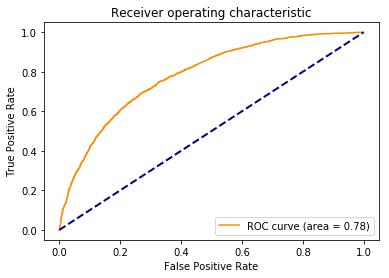

In [52]:
#Question 15
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(thresholds,y_true,y_pred):
    y_true_binary = []
    fpr =[]
    tpr = []
    for t in thresholds:
        y_true_binary = []
        for x in y_true:
            if(x>t):
                  y_true_binary.append(1)
            else:
                y_true_binary.append(-1)
        
        print("Plotting the ROC curve for threshold"+str(t))
        fpr_val, tpr_val, _= roc_curve(y_true_binary, y_pred)
        fpr.append(fpr_val)
        tpr.append(tpr_val)
        roc_auc=auc(fpr_val, tpr_val)
        print("auc is = ",roc_auc)
        plt.figure()
        lw = 2
        plt.plot(fpr_val, tpr_val, color='darkorange',
                  label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()
        
q10_algo = prediction_algorithms.knns.KNNWithMeans(k=minimum_k, sim_options=sim_options)
q10_algo.fit(trainset)
predictions = q10_algo.test(testset)
thresholds = [2.5, 3, 3.5, 4]
y_true_test =[] 
y_pred_test =[] 
for x  in testset:
    y_true_test.append(x[2])
for x  in predictions:
    y_pred_test.append(x.est)
plot_roc_curves(thresholds,y_true_test,y_pred_test)

Model with factor equal to 2
Model with factor equal to 4
Model with factor equal to 6
Model with factor equal to 8
Model with factor equal to 10
Model with factor equal to 12
Model with factor equal to 14
Model with factor equal to 16
Model with factor equal to 18
Model with factor equal to 20
Model with factor equal to 22
Model with factor equal to 24
Model with factor equal to 26
Model with factor equal to 28
Model with factor equal to 30
Model with factor equal to 32
Model with factor equal to 34
Model with factor equal to 36
Model with factor equal to 38
Model with factor equal to 40
Model with factor equal to 42
Model with factor equal to 44
Model with factor equal to 46
Model with factor equal to 48
Model with factor equal to 50


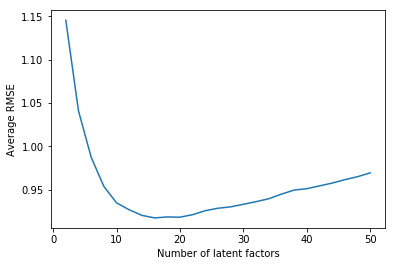

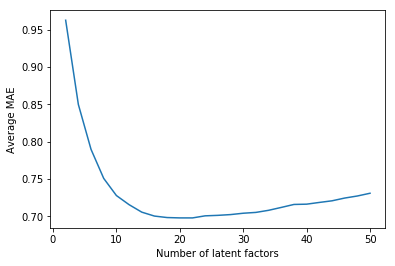

In [53]:
#Question 17
q16_rmse_values = []
q16_mae_values = []
factor_values = np.arange(2,51,2)
for factor_temp in factor_values:
    print("Model with factor equal to " + str(factor_temp))
    q16_algo = prediction_algorithms.matrix_factorization.NMF(n_factors=factor_temp,biased =False)
    q16_model = model_selection.validation.cross_validate(q16_algo, data, cv=10, return_train_measures=True, n_jobs=-1)
    q16_rmse_values.append(np.average(q16_model['test_rmse']))
    q16_mae_values.append(np.average(q16_model['test_mae']))
plt.plot(factor_values,q16_rmse_values)
plt.xlabel('Number of latent factors')
plt.ylabel('Average RMSE')
plt.show()
plt.plot(factor_values,q16_mae_values)
plt.xlabel('Number of latent factors')
plt.ylabel('Average MAE')
plt.show()

In [56]:
#Question 18
'''
k1 = np.argsort(np.array(q16_rmse_values))
k2 = np.argsort(np.array(q16_mae_values))
print(len(q16_mae_values))
print((factor_values))
print(factor_values[k1])
print(factor_values[k2])
'''
print("minimum average RMSE",np.min(q16_rmse_values))
print("minimum average MAE",np.min(q16_mae_values))



minimum average RMSE 0.9173699829489322
minimum average MAE 0.6980732169450112


In [169]:
A = np.sort(q16_mae_values)
idx = np.argsort(q16_mae_values)
print('\n')
print(np.sort(q16_mae_values))

print("k", '\t', "avg. mae")     #table column headings
print("---", '\t', "-----")

for i in range(0,len(q16_mae_values)):
    #print('mae is', A[i])
    #print('idx is', idx[i])
    #print('k is',factor_values[idx[i]])
    print(factor_values[idx[i]], '\t', A[i])



[0.69807322 0.69809211 0.69856164 0.70054709 0.70085825 0.70150559
 0.70252754 0.70434065 0.70545028 0.70580558 0.70825594 0.71211688
 0.71580476 0.71609764 0.71647534 0.71878819 0.72096606 0.72465422
 0.72741296 0.72803326 0.73109472 0.75096613 0.78984397 0.84994965
 0.9626704 ]
k 	 avg. mae
--- 	 -----
22 	 0.6980732169450112
20 	 0.6980921115868989
18 	 0.6985616399299955
16 	 0.7005470937066833
24 	 0.7008582522195252
26 	 0.7015055904813626
28 	 0.7025275408642652
30 	 0.7043406467727925
32 	 0.7054502849280025
14 	 0.7058055761706836
34 	 0.7082559428042159
36 	 0.7121168812307984
12 	 0.7158047615920458
38 	 0.7160976410078426
40 	 0.7164753437979912
42 	 0.7187881931346238
44 	 0.7209660558039834
46 	 0.7246542189151282
48 	 0.7274129600968766
10 	 0.7280332630940001
50 	 0.7310947191243168
8 	 0.7509661323985887
6 	 0.7898439748888251
4 	 0.8499496519281029
2 	 0.9626704037854589


In [170]:
A = np.sort(q16_rmse_values)
idx = np.argsort(q16_rmse_values)
print('\n')
print(np.sort(q16_rmse_values))

print("k", '\t', "avg. rmse")     #table column headings
print("---", '\t', "-----")

for i in range(0,len(q16_rmse_values)):
    #print('mae is', A[i])
    #print('idx is', idx[i])
    #print('k is',factor_values[idx[i]])
    print(factor_values[idx[i]], '\t', A[i])



[0.91736998 0.91820153 0.9185067  0.92033315 0.92110718 0.9257334
 0.92673746 0.92852365 0.93015868 0.93308759 0.93477621 0.93612231
 0.93947992 0.94481168 0.94950697 0.95108658 0.95376886 0.95434475
 0.9575504  0.96152063 0.96491611 0.96938712 0.98743476 1.04097229
 1.14556297]
k 	 avg. rmse
--- 	 -----
16 	 0.9173699829489322
20 	 0.9182015345822083
18 	 0.9185067009258011
14 	 0.9203331543584866
22 	 0.9211071840317354
24 	 0.9257333966824127
12 	 0.9267374597772589
26 	 0.9285236518139042
28 	 0.9301586847195835
30 	 0.9330875869760232
10 	 0.9347762095259025
32 	 0.9361223110503183
34 	 0.9394799177705636
36 	 0.9448116758187876
38 	 0.9495069734314947
40 	 0.9510865826885613
8 	 0.9537688607266382
42 	 0.9543447529224285
44 	 0.9575504047079082
46 	 0.9615206254661848
48 	 0.9649161127800105
50 	 0.9693871162620681
6 	 0.9874347644386436
4 	 1.0409722877077308
2 	 1.145562972914427


In [66]:
min_k_q18= 18

In [178]:

def nnmf_train(trimmer,factor_values,is_biased=False):
    nnmf_rmse_values = []
    nnmf_mae_values = []
    #factor_values = np.arange(2,101,2)
    for factor_temp in factor_values:
        print("Model with factor equal to " + str(factor_temp))
        kf = KFold(n_splits=10)
        q16_algo = prediction_algorithms.matrix_factorization.NMF(n_factors=factor_temp,biased =is_biased)
        rmse_values_temp = []
        mae_values_temp = []
        pair_no = 1
        for trainset, testset in kf.split(data):
            print("----Pair " + str(pair_no))
            pair_no = pair_no + 1
            q16_algo.fit(trainset)
            trimmed_testset = trimmer(testset)
            print("Size of orginal testset " + str(len(testset)))
            print("Size of trimmed testset " + str(len(trimmed_testset)))
            predictions = q16_algo.test(trimmed_testset)
            rmse_values_temp.append(accuracy.rmse(predictions))
            mae_values_temp.append(accuracy.mae(predictions))
        nnmf_rmse_values.append(np.average(rmse_values_temp))
        nnmf_mae_values.append(np.average(mae_values_temp))
    
    print('min value of avg rmse=', np.min(nnmf_rmse_values))
    print('min value of avg MAE=', np.min(nnmf_mae_values))
    plt.plot(factor_values,nnmf_rmse_values)
    plt.xlabel('k')
    plt.ylabel('Number of latent factors')
    plt.show()
    plt.plot(factor_values,nnmf_mae_values)
    plt.xlabel('Number of latent factors')
    plt.ylabel('Average MAE')
    plt.show()
    print("min avg mae is",np.min(nnmf_mae_values))
    print("min avg rmse is",np.min(nnmf_rmse_values))

    A = np.sort(nnmf_rmse_values)
    idx = np.argsort(nnmf_rmse_values)
    print("k", '\t', "avg. rmse")     #table column headings
    print("---", '\t', "-----")

    for i in range(0,len(nnmf_rmse_values)):
        #print('mae is', A[i])
        #print('idx is', idx[i])
        #print('k is',factor_values[idx[i]])
        print(factor_values[idx[i]], '\t', A[i])

    A = np.sort(nnmf_mae_values)
    idx = np.argsort(nnmf_mae_values)

    print("k", '\t', "avg. mae")     #table column headings
    print("---", '\t', "-----")

    for i in range(0,len(nnmf_mae_values)):
        #print('mae is', A[i])
        #print('idx is', idx[i])
        #print('k is',factor_values[idx[i]])
        print(factor_values[idx[i]], '\t', A[i])

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 6907
RMSE: 1.6740
MAE:  1.5152
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 6895
RMSE: 1.6526
MAE:  1.4906
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 6868
RMSE: 1.6747
MAE:  1.5152
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 6972
RMSE: 1.6646
MAE:  1.5092
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 6770
RMSE: 1.6748
MAE:  1.5112
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 6854
RMSE: 1.6689
MAE:  1.5077
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 6894
RMSE: 1.6595
MAE:  1.5018
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 6888
RMSE: 1.6703
MAE:  1.5105
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 6913
RMSE: 1.6658
MAE:  1.5042
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6912
RMSE: 1.6877
MAE:  1.5252
Model with

Size of orginal testset 10084
Size of trimmed testset 6992
RMSE: 0.8757
MAE:  0.6736
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 6857
RMSE: 0.8842
MAE:  0.6747
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 6910
RMSE: 0.8675
MAE:  0.6708
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 6890
RMSE: 0.8832
MAE:  0.6770
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 6840
RMSE: 0.8911
MAE:  0.6814
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 6833
RMSE: 0.8681
MAE:  0.6727
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6895
RMSE: 0.8763
MAE:  0.6749
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 6956
RMSE: 0.8774
MAE:  0.6641
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 7034
RMSE: 0.8801
MAE:  0.6699
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 6909
RMSE: 0.8798
MAE:  0.6695
----Pair 4
Size of o

Size of orginal testset 10083
Size of trimmed testset 6912
RMSE: 0.9830
MAE:  0.7356
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 6901
RMSE: 1.0033
MAE:  0.7624
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 6850
RMSE: 0.9770
MAE:  0.7343
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6974
RMSE: 0.9959
MAE:  0.7557
Model with factor equal to 36
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 6922
RMSE: 1.0003
MAE:  0.7550
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 6870
RMSE: 1.0112
MAE:  0.7600
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 6929
RMSE: 1.0212
MAE:  0.7742
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 6930
RMSE: 1.0027
MAE:  0.7520
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 6842
RMSE: 1.0145
MAE:  0.7563
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 6875
RMSE: 1.0076
MAE:  0.7636
----Pair 7
Size of o

----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6960
RMSE: 1.1063
MAE:  0.8466
min value of avg rmse= 0.8786212917071612
min value of avg MAE= 0.6688588226480088


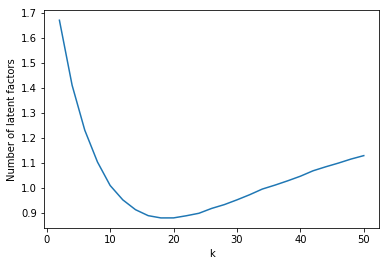

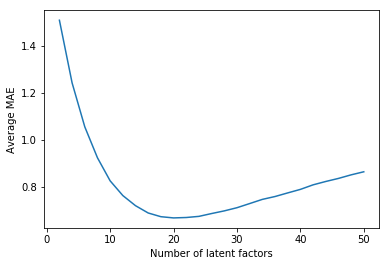

min avg mae is 0.6688588226480088
min avg rmse is 0.8786212917071612
k 	 avg. rmse
--- 	 -----
18 	 0.8786212917071612
20 	 0.8787092414908863
22 	 0.887196147336582
16 	 0.8876731594408064
24 	 0.8971953464974604
14 	 0.9115356457657462
26 	 0.9165544093922311
28 	 0.9317926229221986
12 	 0.9507681632402051
30 	 0.9508608676646242
32 	 0.9713760083889402
34 	 0.9940803804033385
10 	 1.0083241327693326
36 	 1.0098654826759288
38 	 1.0270270255689535
40 	 1.045410962766153
42 	 1.0671370500214852
44 	 1.0831144264904018
46 	 1.0979468879911223
8 	 1.1024037222205276
48 	 1.1141458164346116
50 	 1.1278118265721873
6 	 1.2295016133641723
4 	 1.4094558496357548
2 	 1.669306003328667
k 	 avg. mae
--- 	 -----
20 	 0.6688588226480088
22 	 0.6705987422304532
18 	 0.6740536535527177
24 	 0.6754430074864637
26 	 0.687460716823203
16 	 0.6898245791997537
28 	 0.6987540194158631
30 	 0.7122483155727138
14 	 0.720856524636262
32 	 0.7298484079415911
34 	 0.7476010208503406
36 	 0.7597832956448581
1

In [179]:
#Question 19---To run
nnmf_train(getPopular,np.arange(2,51,2))


Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 3172
RMSE: 1.5831
MAE:  1.3799
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 3188
RMSE: 1.5388
MAE:  1.3367
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 3133
RMSE: 1.5732
MAE:  1.3647
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 3216
RMSE: 1.5683
MAE:  1.3607
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 3268
RMSE: 1.5792
MAE:  1.3652
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 3259
RMSE: 1.5649
MAE:  1.3604
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 3173
RMSE: 1.5977
MAE:  1.3879
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 3220
RMSE: 1.5727
MAE:  1.3574
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 3199
RMSE: 1.5927
MAE:  1.3823
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3128
RMSE: 1.5817
MAE:  1.3734
Model with

----Pair 4
Size of orginal testset 10084
Size of trimmed testset 3216
RMSE: 0.9962
MAE:  0.7640
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 3219
RMSE: 1.0086
MAE:  0.7773
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 3155
RMSE: 0.9882
MAE:  0.7560
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 3166
RMSE: 1.0117
MAE:  0.7756
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 3170
RMSE: 0.9825
MAE:  0.7581
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 3215
RMSE: 1.0148
MAE:  0.7840
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3167
RMSE: 1.0239
MAE:  0.7912
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 3099
RMSE: 0.9843
MAE:  0.7617
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 3216
RMSE: 1.0013
MAE:  0.7700
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 3118
RMSE: 0.9898
MAE:  0.7676
----Pair 

----Pair 7
Size of orginal testset 10083
Size of trimmed testset 3223
RMSE: 1.0322
MAE:  0.7941
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 3166
RMSE: 1.0498
MAE:  0.8010
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 3217
RMSE: 1.0563
MAE:  0.8194
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3177
RMSE: 1.0586
MAE:  0.8150
Model with factor equal to 36
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 3266
RMSE: 1.0617
MAE:  0.8086
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 3196
RMSE: 1.0464
MAE:  0.8023
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 3185
RMSE: 1.0792
MAE:  0.8370
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 3135
RMSE: 1.0482
MAE:  0.8040
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 3255
RMSE: 1.0368
MAE:  0.7997
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 3182
RMSE: 1.0581
MAE:  0.8167
----Pair 

----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3188
RMSE: 1.1488
MAE:  0.8901
min value of avg rmse= 1.0026158869948645
min value of avg MAE= 0.7696104602535765


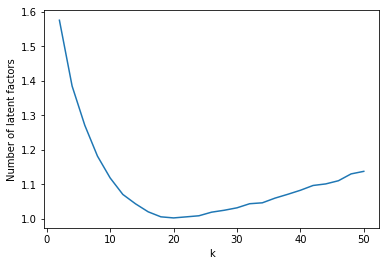

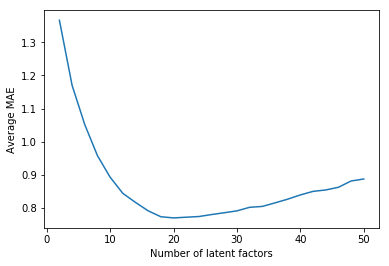

min avg mae is 0.7696104602535765
min avg rmse is 1.0026158869948645
k 	 avg. rmse
--- 	 -----
20 	 1.0026158869948645
22 	 1.0056793798276378
18 	 1.0057746123347866
24 	 1.0088185664496716
26 	 1.0192698999265815
16 	 1.0202692936058153
28 	 1.0248320678013638
30 	 1.0318493923471987
14 	 1.0434522218826119
32 	 1.0437183519177289
34 	 1.0463600744142338
36 	 1.0599503303388655
12 	 1.0706485664453438
38 	 1.0709599021823462
40 	 1.082668587244314
42 	 1.0965811875232103
44 	 1.1011129351237874
46 	 1.110304845727968
10 	 1.1184453362160245
48 	 1.1301156905623309
50 	 1.1375125401711883
8 	 1.1816717954886755
6 	 1.2710319733558249
4 	 1.3846575026794559
2 	 1.575221343568296
k 	 avg. mae
--- 	 -----
20 	 0.7696104602535765
22 	 0.7717563548511295
18 	 0.773141616906244
24 	 0.7738221935762609
26 	 0.7798073482481407
28 	 0.7852437812559008
30 	 0.7909323328361493
16 	 0.7909453825902919
32 	 0.8016666906526595
34 	 0.8043419298068495
36 	 0.8150807343161649
14 	 0.8164495874384856


In [180]:
#Question 20---To run
nnmf_train(getUnpopular,np.arange(2,51,2))

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 70
RMSE: 1.8541
MAE:  1.6825
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 36
RMSE: 1.8296
MAE:  1.6141
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 102
RMSE: 1.7317
MAE:  1.5588
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 32
RMSE: 1.9013
MAE:  1.6532
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 53
RMSE: 1.8612
MAE:  1.6674
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 40
RMSE: 1.6896
MAE:  1.4347
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 85
RMSE: 1.7213
MAE:  1.5398
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 74
RMSE: 1.8395
MAE:  1.6754
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 51
RMSE: 1.9306
MAE:  1.7844
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 48
RMSE: 1.9018
MAE:  1.7069
Model with factor equal to 4


Size of orginal testset 10084
Size of trimmed testset 57
RMSE: 1.5013
MAE:  1.2031
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 40
RMSE: 1.3040
MAE:  0.9823
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 56
RMSE: 1.4357
MAE:  1.0626
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 28
RMSE: 1.3942
MAE:  1.1537
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 69
RMSE: 1.4730
MAE:  1.1932
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 42
RMSE: 1.4588
MAE:  1.0993
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 77
RMSE: 1.3879
MAE:  1.0819
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 53
RMSE: 1.4538
MAE:  1.1961
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 54
RMSE: 1.4608
MAE:  1.1167
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 31
RMSE: 1.3701
MAE:  1.1022
----Pair 6
Size of orginal testset 10084

Size of orginal testset 10084
Size of trimmed testset 55
RMSE: 1.4653
MAE:  1.1113
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 99
RMSE: 1.5260
MAE:  1.1177
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 75
RMSE: 1.4741
MAE:  1.0867
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 38
RMSE: 1.5914
MAE:  1.0780
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 62
RMSE: 1.4707
MAE:  1.1253
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 56
RMSE: 1.5945
MAE:  1.1664
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 43
RMSE: 1.6580
MAE:  1.1258
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 93
RMSE: 1.6731
MAE:  1.2090
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 22
RMSE: 1.7103
MAE:  1.3430
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 19
RMSE: 1.2078
MAE:  0.9500
Model with factor equal to 38
----Pair 1
Size of orginal testset 10084

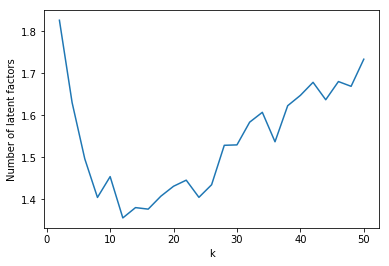

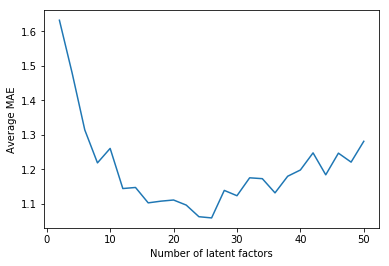

min avg mae is 1.0587011259365338
min avg rmse is 1.356053722364982
k 	 avg. rmse
--- 	 -----
12 	 1.356053722364982
16 	 1.3769395114427296
14 	 1.380580214325742
8 	 1.4047474820264307
24 	 1.40497902845018
18 	 1.4076992888046118
20 	 1.4313604631668553
26 	 1.4349105517885505
22 	 1.4458098489317714
10 	 1.4542727120071892
6 	 1.4965269940193386
28 	 1.5287173419809625
30 	 1.5296927769229636
36 	 1.5371198020978443
32 	 1.5836692422522711
34 	 1.6071433017187213
38 	 1.6228563305467028
4 	 1.6303299647443286
44 	 1.6370602778304435
40 	 1.6474119851854987
48 	 1.6689510017337477
42 	 1.6784783312405338
46 	 1.6803086527786508
50 	 1.7334272704981264
2 	 1.8260779737235695
k 	 avg. mae
--- 	 -----
26 	 1.0587011259365338
24 	 1.0621931759071601
22 	 1.0958825489523956
16 	 1.1023390808290847
18 	 1.1072617667468916
20 	 1.1106150014368306
30 	 1.1230308680100545
36 	 1.1313256905948819
28 	 1.138443190074306
12 	 1.1438418809585895
14 	 1.1469762670984098
34 	 1.1724752415287887
32

In [181]:
#Question 21---To run
nnmf_train(getHighVariance,np.arange(2,51,2))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Plotting the ROC curve for threshold2.5
auc is =  0.7816698892307723


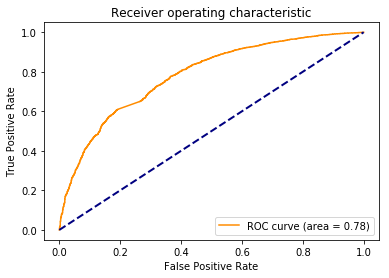

Plotting the ROC curve for threshold3
auc is =  0.7758485119243483


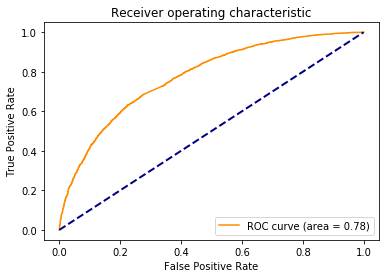

Plotting the ROC curve for threshold3.5
auc is =  0.7678992095436924


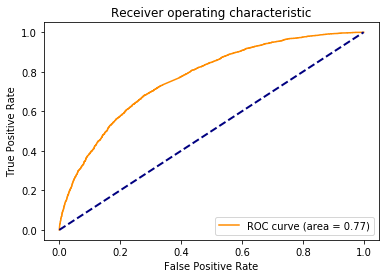

Plotting the ROC curve for threshold4
auc is =  0.759246871465351


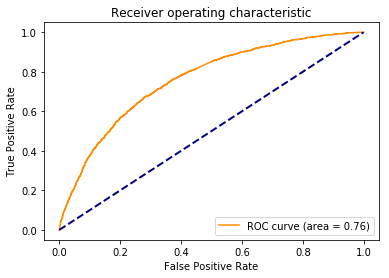

In [68]:
#Question 22
import random

raw_ratings = data.raw_ratings

# shuffle ratings if you want
random.shuffle(raw_ratings)

# A = 90% of the data, B = 10% of the data
threshold = int(.9 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]
data.raw_ratings = A_raw_ratings
trainset = data.build_full_trainset()
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B

q16_algo = prediction_algorithms.matrix_factorization.NMF(n_factors=min_k_q18,biased =False)
q10_algo.fit(trainset)
predictions = q10_algo.test(testset)
thresholds = [2.5, 3, 3.5, 4]
y_true_test =[] 
y_pred_test =[] 
for x  in testset:
    y_true_test.append(x[2])
for x  in predictions:
    y_pred_test.append(x.est)
plot_roc_curves(thresholds,y_true_test,y_pred_test)

In [201]:
#Question 23
q23_algo = prediction_algorithms.matrix_factorization.NMF(n_factors=20,biased =False)
trainset = data.build_full_trainset()
print(trainset.n_items)
print(trainset.n_users)
q23_algo.fit(trainset)
items_V = q23_algo.qi.T
users_U = q23_algo.pu
print(items_V.shape)
print(users_U.shape)

print(np.unique(items_V))

def print_top10moviesgenre(coloumn_no):
    column1 = items_V[:,coloumn_no]
    sorted_indices_column1 = np.argsort(column1)[::-1]
    top10_sorted_indices= sorted_indices_column1[0:10]
    print(top10_sorted_indices)

    top10movieids = top10_sorted_indices+1
    movies_df = pd.read_csv('movies.csv')
    #top10movies = movies_df.loc[movies_df['movieId'] == top10movieids]
    top10movies = movies_df[movies_df['movieId'].isin(top10movieids)]
    top10moviesgenres = top10movies['genres']
    print(top10moviesgenres)
    
    



9724
610
(20, 9724)
(610, 20)
[7.18480322e-09 8.72864306e-09 6.80481840e-08 ... 2.63150744e+00
 2.73933409e+00 2.84886561e+00]


In [206]:
mf=pd.read_csv('movies.csv')

algo=prediction_algorithms.matrix_factorization.NMF(n_factors=20)
trainset=data.build_full_trainset()
algo.fit(trainset)
genre=[]
movies=mf.movieId
movies=np.unique(movies)
for k in range(1,20):
    print ("k :",k)
    genre=[]
    sortedList = sorted(zip(algo.qi.T[:,k],movies),reverse=True)
    list10=map(lambda x:x[1],sortedList[:10])
    for i in list10:
        genre.append(mf[mf.movieId==i]['genres'])
    print (genre)


k : 1
[16    Drama|Romance
Name: genres, dtype: object, 2    Comedy|Romance
Name: genres, dtype: object, 11    Comedy|Horror
Name: genres, dtype: object, 0    Adventure|Animation|Children|Comedy|Fantasy
Name: genres, dtype: object, 5    Action|Crime|Thriller
Name: genres, dtype: object, 15    Crime|Drama
Name: genres, dtype: object, 19    Action|Comedy|Crime|Drama|Thriller
Name: genres, dtype: object, 1    Adventure|Children|Fantasy
Name: genres, dtype: object, 8    Action
Name: genres, dtype: object, 7    Adventure|Children
Name: genres, dtype: object]
k : 2
[2    Comedy|Romance
Name: genres, dtype: object, 3    Comedy|Drama|Romance
Name: genres, dtype: object, 13    Drama
Name: genres, dtype: object, 14    Action|Adventure|Romance
Name: genres, dtype: object, 16    Drama|Romance
Name: genres, dtype: object, 0    Adventure|Animation|Children|Comedy|Fantasy
Name: genres, dtype: object, 17    Comedy
Name: genres, dtype: object, 4    Comedy
Name: genres, dtype: object, 6    Comedy|Romanc

In [202]:
print_top10moviesgenre(0)
print_top10moviesgenre(1)
print_top10moviesgenre(2)

[12  8 17  6  5  1  3 18 10 14]
1       Adventure|Children|Fantasy
3             Comedy|Drama|Romance
5            Action|Crime|Thriller
6                   Comedy|Romance
8                           Action
10            Comedy|Drama|Romance
12    Adventure|Animation|Children
14        Action|Adventure|Romance
17                          Comedy
18                          Comedy
Name: genres, dtype: object
[13  8  4  7  2 18 12 10 14 17]
2                   Comedy|Romance
4                           Comedy
7               Adventure|Children
8                           Action
10            Comedy|Drama|Romance
12    Adventure|Animation|Children
13                           Drama
14        Action|Adventure|Romance
17                          Comedy
18                          Comedy
Name: genres, dtype: object
[17 13  9  1 19  5  8 10  2 12]
1             Adventure|Children|Fantasy
2                         Comedy|Romance
5                  Action|Crime|Thriller
8                        

In [207]:
for i in range(0,20):
 print('-----------------')
 print_top10moviesgenre(i)
 print('----------------')

-----------------
[12  8 17  6  5  1  3 18 10 14]
1       Adventure|Children|Fantasy
3             Comedy|Drama|Romance
5            Action|Crime|Thriller
6                   Comedy|Romance
8                           Action
10            Comedy|Drama|Romance
12    Adventure|Animation|Children
14        Action|Adventure|Romance
17                          Comedy
18                          Comedy
Name: genres, dtype: object
----------------
-----------------
[13  8  4  7  2 18 12 10 14 17]
2                   Comedy|Romance
4                           Comedy
7               Adventure|Children
8                           Action
10            Comedy|Drama|Romance
12    Adventure|Animation|Children
13                           Drama
14        Action|Adventure|Romance
17                          Comedy
18                          Comedy
Name: genres, dtype: object
----------------
-----------------
[17 13  9  1 19  5  8 10  2 12]
1             Adventure|Children|Fantasy
2                  

------------------For k= 2 --------------------
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8800  0.8648  0.8714  0.8386  0.8735  0.8713  0.8731  0.8629  0.8670  0.8706  0.8673  0.0106  
MAE (testset)     0.6727  0.6656  0.6706  0.6491  0.6705  0.6712  0.6691  0.6650  0.6661  0.6657  0.6666  0.0064  
Fit time          1.33    1.29    1.26    1.25    1.24    1.25    1.27    1.24    1.28    1.27    1.27    0.03    
Test time         0.06    0.06    0.06    0.06    0.14    0.06    0.06    0.15    0.07    0.06    0.08    0.03    
------------------For k= 4 --------------------
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8733  0.8659  0.8645  0.8689  0.8597  0.8736  0.8528  0.8678  0.8689  0.8762  0.8672

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8726  0.8580  0.8720  0.8541  0.8816  0.8634  0.8596  0.8574  0.8705  0.8711  0.8661  0.0083  
MAE (testset)     0.6685  0.6568  0.6676  0.6574  0.6778  0.6629  0.6645  0.6567  0.6708  0.6699  0.6653  0.0066  
Fit time          3.63    3.76    3.43    3.48    3.68    3.84    5.23    3.24    4.22    2.96    3.75    0.59    
Test time         0.17    0.09    0.11    0.10    0.10    0.20    0.09    0.09    0.19    0.08    0.12    0.05    
------------------For k= 28 --------------------
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8583  0.8605  0.8707  0.8634  0.8634  0.8688  0.8722  0.8572  0.8653  0.8612  0.8641  0.0048  
MAE (testset)     0.6587  0.6599  0.

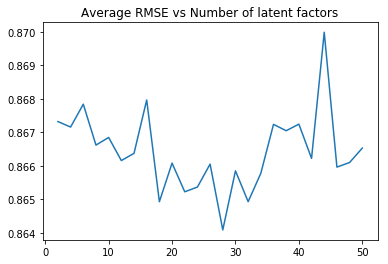

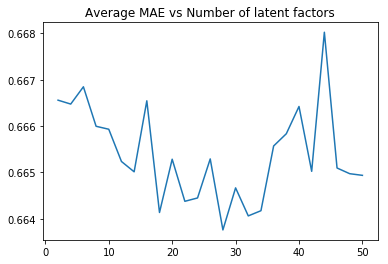

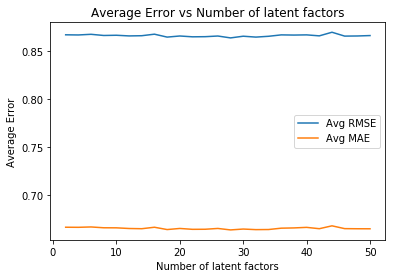

In [75]:
#Question 24---
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate, KFold, train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score 

# Define the format
reader = Reader(line_format="user item rating timestamp", sep=',',skip_lines=1)
# Load the data from the file using the reader format
data = Dataset.load_from_file('ml-latest-small/ml-latest-small/ratings.csv', reader=reader)

meanRMSE = []
meanMAE = []

for k in np.arange(2, 51, 2):
    print ("------------------For k=",k,"--------------------")
    algo = SVD(n_factors = k, random_state = 37)
    ans=cross_validate(algo, data, cv=10, verbose=True)
    meanRMSE.append(np.mean(ans.get('test_rmse')))
    meanMAE.append(np.mean(ans.get('test_mae')))
    
kvals = np.arange(2, 51, 2)
plt.plot(kvals, meanRMSE)
plt.title("Average RMSE vs Number of latent factors")
plt.show()

plt.plot(kvals, meanMAE)
plt.title("Average MAE vs Number of latent factors")
plt.show()

plt.xlabel("Number of latent factors")
plt.ylabel("Average Error")
plt.title("Average Error vs Number of latent factors")
plt.plot(kvals, meanRMSE)
plt.plot(kvals, meanMAE)
plt.legend(["Avg RMSE", "Avg MAE"])
plt.show()

In [78]:
#Question 25
'''
k1 = np.argsort(np.array(q24_rmse_values))
k2 = np.argsort(np.array(q24_mae_values))
print((factor_values))
print(factor_values[k1])
print(factor_values[k2])
'''

print("minimum average RMSE",np.min(meanRMSE))
print("minimum average MAE",np.min(meanMAE))

#print("Optimal value of k is",k_for_q24)

minimum average RMSE 0.8640836533047122
minimum average MAE 0.6637592211584292


In [80]:
A = np.sort(meanMAE)
idx = np.argsort(meanMAE)
print('\n')
print(np.sort(meanMAE))

for i in range(0,len(meanMAE)):
    print('mae is', A[i])
    print('idx is', idx[i])
    print('k is',factor_values[idx[i]])



[0.66375922 0.66406179 0.66413536 0.66417384 0.66437667 0.66444904
 0.66466646 0.66493694 0.66497252 0.6650132  0.66502377 0.66509554
 0.66523605 0.66528487 0.66529134 0.66557072 0.66583499 0.66593191
 0.66599579 0.66642316 0.66647515 0.66654548 0.66655923 0.66684793
 0.6680253 ]
mae is 0.6637592211584292
idx is 13
k is 28
mae is 0.664061787692862
idx is 15
k is 32
mae is 0.6641353550098751
idx is 8
k is 18
mae is 0.6641738378581237
idx is 16
k is 34
mae is 0.6643766735267662
idx is 10
k is 22
mae is 0.6644490375802754
idx is 11
k is 24
mae is 0.6646664580196369
idx is 14
k is 30
mae is 0.6649369353899413
idx is 24
k is 50
mae is 0.6649725193463922
idx is 23
k is 48
mae is 0.6650131979129754
idx is 6
k is 14
mae is 0.6650237671316303
idx is 20
k is 42
mae is 0.6650955405663892
idx is 22
k is 46
mae is 0.6652360547932783
idx is 5
k is 12
mae is 0.665284874952964
idx is 9
k is 20
mae is 0.6652913397295015
idx is 12
k is 26
mae is 0.6655707207969016
idx is 17
k is 36
mae is 0.6658349909

In [81]:
A = np.sort(meanRMSE)
idx = np.argsort(meanRMSE)
print('\n')
print(np.sort(meanRMSE))

for i in range(0,len(meanRMSE)):
    print('rmse is', A[i])
    print('idx is', idx[i])
    print('k is',factor_values[idx[i]])



[0.86408365 0.86492705 0.86492791 0.86522322 0.86536481 0.86577649
 0.86584951 0.86596111 0.86605111 0.86608021 0.86609915 0.86615676
 0.86622179 0.86637199 0.86652894 0.86661938 0.86684699 0.86704867
 0.86715822 0.86723835 0.86724523 0.86732242 0.86784109 0.8679674
 0.86999204]
rmse is 0.8640836533047122
idx is 13
k is 28
rmse is 0.8649270537191873
idx is 8
k is 18
rmse is 0.8649279105308793
idx is 15
k is 32
rmse is 0.8652232184748028
idx is 10
k is 22
rmse is 0.8653648130101578
idx is 11
k is 24
rmse is 0.8657764941093665
idx is 16
k is 34
rmse is 0.8658495122703942
idx is 14
k is 30
rmse is 0.8659611079131846
idx is 22
k is 46
rmse is 0.8660511104865959
idx is 12
k is 26
rmse is 0.8660802071569339
idx is 9
k is 20
rmse is 0.866099145528708
idx is 23
k is 48
rmse is 0.8661567644403627
idx is 5
k is 12
rmse is 0.8662217887146495
idx is 20
k is 42
rmse is 0.8663719907274441
idx is 6
k is 14
rmse is 0.866528935163543
idx is 24
k is 50
rmse is 0.8666193760742612
idx is 3
k is 8
rmse i

In [208]:
#to run
k_for_q24 = 18

In [ ]:
from surprise import SVD
def svd_train(trimmer,factor_values):
    nnmf_rmse_values = []
    nnmf_mae_values = []
    #factor_values = np.arange(2,101,2)
    for factor_temp in factor_values:
        print("Model with factor equal to " + str(factor_temp))
        kf = KFold(n_splits=10)
        q16_algo = SVD(n_factors=factor_temp)
        rmse_values_temp = []
        mae_values_temp = []
        pair_no = 1
        for trainset, testset in kf.split(data):
            print("----Pair " + str(pair_no))
            pair_no = pair_no + 1
            q16_algo.fit(trainset)
            trimmed_testset = trimmer(testset)
            print("Size of orginal testset " + str(len(testset)))
            print("Size of trimmed testset " + str(len(trimmed_testset)))
            predictions = q16_algo.test(trimmed_testset)
            rmse_values_temp.append(accuracy.rmse(predictions))
            mae_values_temp.append(accuracy.mae(predictions))
        nnmf_rmse_values.append(np.average(rmse_values_temp))
        nnmf_mae_values.append(np.average(mae_values_temp))
    print('min value of avg rmse=', np.min(nnmf_rmse_values))
    print('min value of avg MAE=', np.min(nnmf_mae_values))
    plt.plot(factor_values,nnmf_rmse_values)
    plt.xlabel('Number of latent factors')
    plt.ylabel('Average MSE')
    plt.show()
    plt.plot(factor_values,nnmf_mae_values)
    plt.xlabel('Number of latent factors')
    plt.ylabel('Average MAE')
    plt.show()
 

Plotting the ROC curve for threshold2.5
auc is =  0.7807930764785072


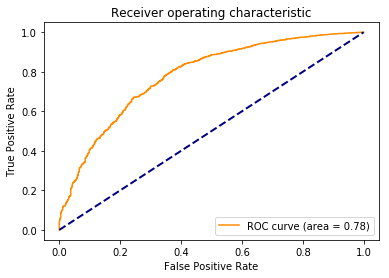

Plotting the ROC curve for threshold3
auc is =  0.7820978038583458


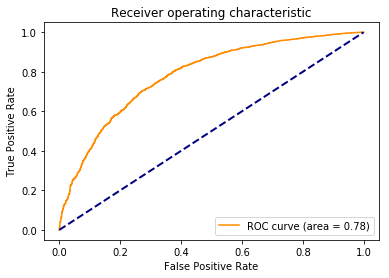

Plotting the ROC curve for threshold3.5
auc is =  0.7915739393985068


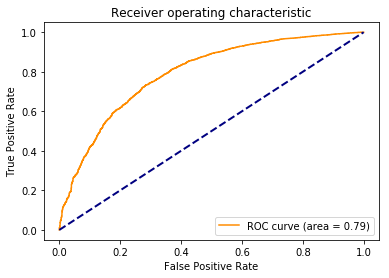

Plotting the ROC curve for threshold4
auc is =  0.7849628768620788


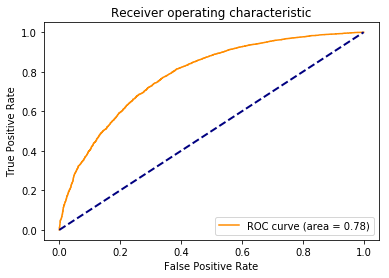

In [209]:
#Question 29

#to run
import random
from surprise import Reader, Dataset, SVD, accuracy
raw_ratings = data.raw_ratings

# shuffle ratings if you want
random.shuffle(raw_ratings)

# A = 90% of the data, B = 10% of the data
threshold = int(.9 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]
data.raw_ratings = A_raw_ratings
trainset = data.build_full_trainset()
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B

q24_algo = SVD(n_factors=k_for_q24)
q24_algo.fit(trainset)
predictions = q24_algo.test(testset)
thresholds = [2.5, 3, 3.5, 4]
y_true_test =[] 
y_pred_test =[] 
for x  in testset:
    y_true_test.append(x[2])
for x  in predictions:
    y_pred_test.append(x.est)
plot_roc_curves(thresholds,y_true_test,y_pred_test)

------------------For k= 2 --------------------
RMSE: 0.8567
RMSE: 0.8567
RMSE: 0.8382
RMSE: 0.8489
RMSE: 0.8401
RMSE: 0.8472
RMSE: 0.8575
RMSE: 0.8607
RMSE: 0.8423
RMSE: 0.8491
------------------For k= 4 --------------------
RMSE: 0.8366
RMSE: 0.8388
RMSE: 0.8465
RMSE: 0.8470
RMSE: 0.8576
RMSE: 0.8626
RMSE: 0.8615
RMSE: 0.8586
RMSE: 0.8454
RMSE: 0.8588
------------------For k= 6 --------------------
RMSE: 0.8392
RMSE: 0.8455
RMSE: 0.8657
RMSE: 0.8489
RMSE: 0.8464
RMSE: 0.8562
RMSE: 0.8458
RMSE: 0.8377
RMSE: 0.8562
RMSE: 0.8523
------------------For k= 8 --------------------
RMSE: 0.8461
RMSE: 0.8568
RMSE: 0.8460
RMSE: 0.8668
RMSE: 0.8512
RMSE: 0.8522
RMSE: 0.8399
RMSE: 0.8424
RMSE: 0.8522
RMSE: 0.8458
------------------For k= 10 --------------------
RMSE: 0.8462
RMSE: 0.8369
RMSE: 0.8501
RMSE: 0.8491
RMSE: 0.8551
RMSE: 0.8388
RMSE: 0.8497
RMSE: 0.8442
RMSE: 0.8590
RMSE: 0.8539
------------------For k= 12 --------------------
RMSE: 0.8385
RMSE: 0.8545
RMSE: 0.8476
RMSE: 0.8523
RMSE: 0.

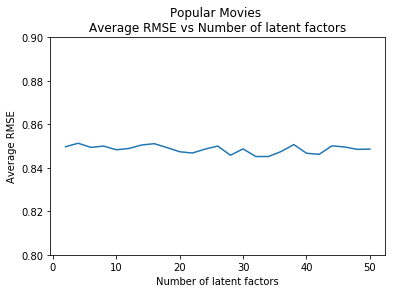

In [162]:
#Question 26
kf = KFold(n_splits=10)

mean_rmse_q26 = []

for k in np.arange(2, 51, 2):
    print ("------------------For k=",k,"--------------------")
    algo = SVD(n_factors = k, random_state = 37)
    rmse = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        newtest = getPopular(testset, 2)
        predictions = algo.test(newtest)
        rmse.append(accuracy.rmse(predictions))
    mean_rmse_q26.append(round(np.mean(rmse),4))

plt.xlabel("Number of latent factors")
plt.ylabel("Average RMSE")
plt.title("Popular Movies \nAverage RMSE vs Number of latent factors")
plt.plot(kvals, mean_rmse_q26)
plt.ylim([0.8,0.9])
plt.show()

------------------For k= 2 --------------------
RMSE: 0.9029
RMSE: 0.8965
RMSE: 0.8959
RMSE: 0.9191
RMSE: 0.9057
RMSE: 0.8943
RMSE: 0.9004
RMSE: 0.8915
RMSE: 0.9067
RMSE: 0.9099
------------------For k= 4 --------------------
RMSE: 0.9080
RMSE: 0.9161
RMSE: 0.9174
RMSE: 0.9135
RMSE: 0.9150
RMSE: 0.8850
RMSE: 0.8902
RMSE: 0.8954
RMSE: 0.8762
RMSE: 0.9169
------------------For k= 6 --------------------
RMSE: 0.8830
RMSE: 0.9186
RMSE: 0.8944
RMSE: 0.8978
RMSE: 0.8908
RMSE: 0.8986
RMSE: 0.9165
RMSE: 0.8969
RMSE: 0.9019
RMSE: 0.9167
------------------For k= 8 --------------------
RMSE: 0.9068
RMSE: 0.9143
RMSE: 0.8935
RMSE: 0.9135
RMSE: 0.8880
RMSE: 0.9072
RMSE: 0.8980
RMSE: 0.8894
RMSE: 0.8975
RMSE: 0.9171
------------------For k= 10 --------------------
RMSE: 0.9187
RMSE: 0.9076
RMSE: 0.9127
RMSE: 0.9038
RMSE: 0.8740
RMSE: 0.8841
RMSE: 0.9128
RMSE: 0.8875
RMSE: 0.8925
RMSE: 0.8945
------------------For k= 12 --------------------
RMSE: 0.9339
RMSE: 0.8836
RMSE: 0.8892
RMSE: 0.8703
RMSE: 0.

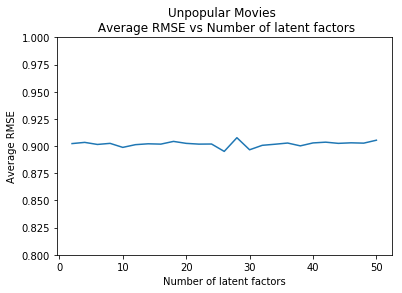

In [165]:
#Question 27
mean_rmse_q27 = []

for k in np.arange(2, 51, 2):
    print ("------------------For k=",k,"--------------------")
    algo = SVD(n_factors = k, random_state = 37)
    rmse = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        newtest = getUnpopular(testset)
        predictions = algo.test(newtest)
        rmse.append(accuracy.rmse(predictions))
    mean_rmse_q27.append(round(np.mean(rmse),4))

plt.xlabel("Number of latent factors")
plt.ylabel("Average RMSE")
plt.title("Unpopular Movies \n Average RMSE vs Number of latent factors")
plt.plot(kvals, mean_rmse_q27)
plt.ylim([0.8,1.0])
plt.show()

------------------For k= 2 --------------------
RMSE: 1.3552
RMSE: 1.4089
RMSE: 1.4159
RMSE: 1.3820
RMSE: 1.4924
RMSE: 1.4771
RMSE: 1.4296
RMSE: 1.2669
RMSE: 1.3910
RMSE: 1.4934
------------------For k= 4 --------------------
RMSE: 1.4724
RMSE: 1.3433
RMSE: 1.5462
RMSE: 1.3767
RMSE: 1.4166
RMSE: 1.4192
RMSE: 1.3221
RMSE: 1.4432
RMSE: 1.4070
RMSE: 1.3648
------------------For k= 6 --------------------
RMSE: 1.4095
RMSE: 1.3173
RMSE: 1.3185
RMSE: 1.3830
RMSE: 1.4069
RMSE: 1.3316
RMSE: 1.4288
RMSE: 1.3176
RMSE: 1.3749
RMSE: 1.3052
------------------For k= 8 --------------------
RMSE: 1.4406
RMSE: 1.3069
RMSE: 1.3541
RMSE: 1.5815
RMSE: 1.4438
RMSE: 1.3890
RMSE: 1.4698
RMSE: 1.3338
RMSE: 1.3920
RMSE: 1.4479
------------------For k= 10 --------------------
RMSE: 1.3739
RMSE: 1.3710
RMSE: 1.2908
RMSE: 1.4456
RMSE: 1.3491
RMSE: 1.4494
RMSE: 1.4148
RMSE: 1.4333
RMSE: 1.2290
RMSE: 1.4274
------------------For k= 12 --------------------
RMSE: 1.5040
RMSE: 1.4135
RMSE: 1.3389
RMSE: 1.4995
RMSE: 1.

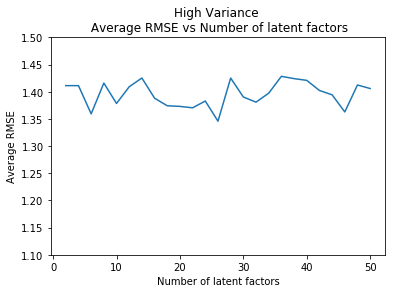

In [167]:
#Question 28
mean_rmse_q28 = []

for i in np.arange(2, 51, 2):
    print ("------------------For k=",k,"--------------------")
    algo = SVD(n_factors = i, random_state = 37)
    rmse = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        newtest = getHighVariance(testset)
        predictions = algo.test(newtest)
        rmse.append(accuracy.rmse(predictions))
    mean_rmse_q28.append(round(np.mean(rmse),4))

plt.xlabel("Number of latent factors")
plt.ylabel("Average RMSE")
plt.title("High Variance \n Average RMSE vs Number of latent factors")
plt.plot(kvals, mean_rmse_q28)
plt.ylim([1.1,1.5])
plt.show()

In [168]:
print("min vale of rmse is",np.min(mean_rmse_q26))
print("min vale of rmse is",np.min(mean_rmse_q27))
print("min vale of rmse is",np.min(mean_rmse_q28))

min vale of rmse is 0.8452
min vale of rmse is 0.8951
min vale of rmse is 1.3458
